In [2]:
import numpy as np
import threading
import time
import psutil

In [3]:
constant_matrix = np.random.randint(0,9, size=(1000, 1000))
constant_matrix

array([[6, 3, 4, ..., 7, 0, 4],
       [8, 3, 1, ..., 1, 1, 3],
       [6, 0, 7, ..., 6, 8, 4],
       ...,
       [1, 0, 3, ..., 0, 6, 8],
       [3, 7, 8, ..., 1, 3, 8],
       [7, 0, 4, ..., 7, 0, 6]])

In [4]:
matrices = []
for i in range(100):
    matrix = np.random.randint(0, 9, size=(1000, 1000))
    matrices.append(matrix)

In [5]:
def matmul(constant_matrix,matrices,st,ed,cpu): #st= starting index, ed= ending index
    result=constant_matrix
    for i in range(st,ed):
        result = np.dot(result,matrices[i])
        cpu.append(psutil.cpu_percent(interval=0.1))
    return result

In [6]:
data=[[] for i in range(6)]

In [7]:
for w in range(1,7):
    c=w
    print("TOTAL THREADS = ",c)
    t = [None] * c
    cpu_p =[[] for q in range(c)]
    s=0
    size=100//c
    r=100 % c
    start = time.time()
    for i in range (c):
        j = s + size
        if i < r:
            j =j+ 1
        t[i]=threading.Thread(target=matmul, args=(constant_matrix,matrices,int(s),int(j),cpu_p[i]))
        t[i].start()
        s=j
    for i in range (c):
        t[i].join()
    all_cpu_usage = []

# Collect CPU usage from all threads
    for cpu_list in cpu_p:
        all_cpu_usage.extend(cpu_list)

# Calculate the total and average CPU usage across all threads
    total_percentage = sum(all_cpu_usage)
    average_percentage = total_percentage / len(all_cpu_usage)
    print(f"Thread {i + 1} Average CPU Usage : ",average_percentage) #Prints AVERAGE CPU USAGE
    end = time.time()
    data[c-1].append(end-start)
    print()

TOTAL THREADS =  1
Thread 1 Average CPU Usage :  82.38199999999999

TOTAL THREADS =  2
Thread 2 Average CPU Usage :  71.95199999999998

TOTAL THREADS =  3
Thread 3 Average CPU Usage :  64.12800000000001

TOTAL THREADS =  4
Thread 4 Average CPU Usage :  82.68699999999998

TOTAL THREADS =  5
Thread 5 Average CPU Usage :  96.92500000000001

TOTAL THREADS =  6
Thread 6 Average CPU Usage :  99.279



In [8]:
import pandas as pd
d = np.array(data)
dd= np.reshape(d, (1, 6))
df = pd.DataFrame(dd, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],index=['Time Taken'])
df

,T1,T2,T3,T4,T5,T6
Time Taken,490.500746,169.250693,117.381205,181.109762,211.102193,138.437237


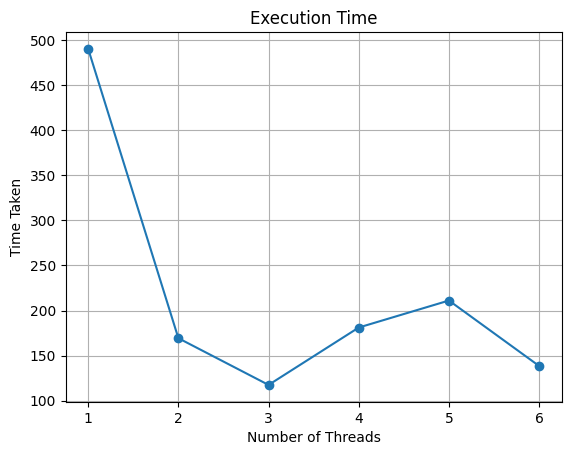

In [9]:
import matplotlib.pyplot as plt
threads = list(range(1,7))
plt.plot(threads, d, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.title('Execution Time')
plt.grid(True)
plt.show()